<h1 align="center">Changes in antipsychotics prescribing during the COVID-19 pandemic</h1>

The purpose of this notebook is to describe trends and variation in antipsychotics prescribing during the COVID-19 pandemic. Four types/classes of of antipsychotic medications have been investigated and the following summaries are provided for each:

1. __Absolute number of antipsychotics issued__

*A summary of the number of events for each antipsychotic medication type*

2. __Number of first prescriptions (defined as none in previous two years)__

*tbc*

3. __Decile of antipsychotics / Rate per 1000__

*A summary of the monthly rates of recorded activity for each antipsychotic medication type, plotted as a decile chart. For each antipsychotic medication type, we also indicate the percentage change in the median from the baseline in April 2019 in April 2020 and April 2021.  These changes are used to give an overall classification of activity change.  These classifications include:*

* *No change: no change in both April 2020 and April 2021.*
* *Increase: an increase in either April 2020 or April 2021.*
* *Sustained drop: a drop of >15% is observed in April 2020 which **had not** returned to within 15% of the baseline by April 2021.*
* *Recovery: a drop of >15% is observed in April 2020 which **had** returned to within 15% of the baseline by April 2021.*

For each of these types we also provide a link to the codelist containing all the codes used for that type. Summaries are provided for the following types of antipsychotic medications:

 * [First generation antipsychotics, excluding long acting depots](#first_gen_antipsychotics)
 * [Second generation antipsychotics, excluding long acting injections](#antipsychotics_second_gen)
 * [Long acting injectable and depot antipsychotics](#antipsychotics_injectable_and_depot)
 * [Prochlorperazine](#Prochlorperazine)



In [22]:
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
from utilities import *
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='png'

INTERACTIVE=False

In [23]:
sentinel_measures = ["antipsychotics_first_gen", "antipsychotics_second_gen", "antipsychotics_injectable_and_depot", "prochlorperazine"]
data_dict = {}

for measure in sentinel_measures:
    df = load_and_drop(measure)
    data_dict[measure] = df
    
data_dict_practice = {}

for measure in sentinel_measures:
    df = load_and_drop(measure, practice=False)
    data_dict_practice[measure] = df

sentinel_measure_codelist_mapping_dict = {"antipsychotics_first_gen":"opensafely-first-generation-antipsychotics-excluding-long-acting-depots-dmd", "antipsychotics_second_gen":"opensafely-second-generation-antipsychotics-excluding-long-acting-injections", "antipsychotics_injectable_and_depot":"opensafely-long-acting-injectable-and-depot-antipsychotics-dmd", "prochlorperazine":"opensafely-prochlorperazine-dmd"}

codelist_dict = {}
for measure in sentinel_measures:
    codelist_name = sentinel_measure_codelist_mapping_dict[measure]
    codelist = pd.read_csv(BASE_DIR /f"codelists/{codelist_name}.csv")
    codelist_dict[measure] = codelist

<a id="first_gen_antipsychotics"></a>
### First generation antipsychotics, excluding long acting depots

The codes used for this measure are available in <a href="https://codelists.opensafely.org/codelist/opensafely/first-generation-antipsychotics-excluding-long-acting-depots-dmd/1e9b227c/">this codelist</a>.

#### 1. Absolute number of antipsychotics issued

Practices included: 43 (97.73%)

Total patients: 0.76M (0.14M events)

,dmd_id,Events,Events (thousands),dmd_type,Description,bnf_code
0,36152011000001103,112021.0,112.021,VMP,Zuclopenthixol acetate 50mg/1ml solution for injection ampoules,040201010AAAAAA
1,321393004,27898.0,27.898,VMP,Benperidol 250microgram tablets,0402010B0AAAAAA


<AxesSubplot:xlabel='date'>

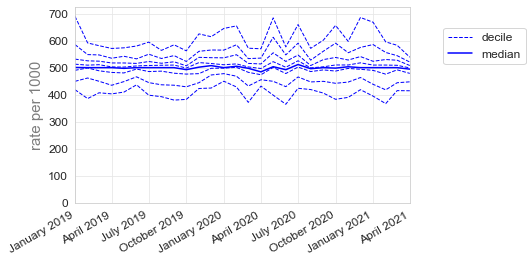

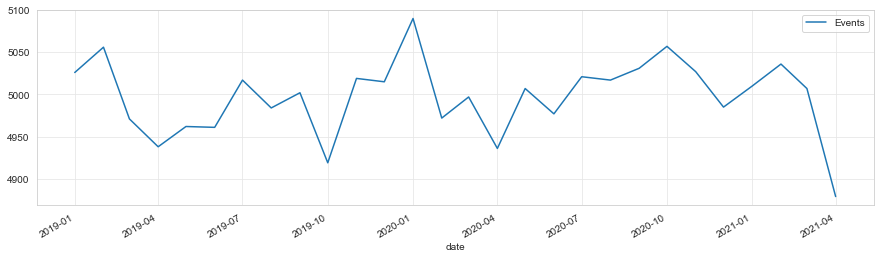

In [25]:
antipsychotics_first_gen_table = generate_sentinel_measure(data_dict, data_dict_practice, codelist_dict, 'antipsychotics_first_gen', 'dmd_id', 'dmd_name', ["2020-02-01", "2020-04-01", "2020-12-01"], interactive=INTERACTIVE)

measure = "antipsychotics_first_gen"

df = data_dict[measure]
    
event_counts = (
    df.groupby(f"date")[f"{measure}"]
    .sum()  # We can't use .count() because the measure column contains zeros.
    .rename("Events")
    .reset_index()
    .sort_values("Events", ascending=False)
)

event_counts.index=pd.to_datetime(event_counts["date"], format="%Y-%m-%d")
event_counts=event_counts.drop(columns=["date"])

event_counts.plot(figsize=(15,4))

#### 2. Number of first prescriptions (defined as none in previous two years)



#### 3. Decile of antipsychotics / Rate per 1000

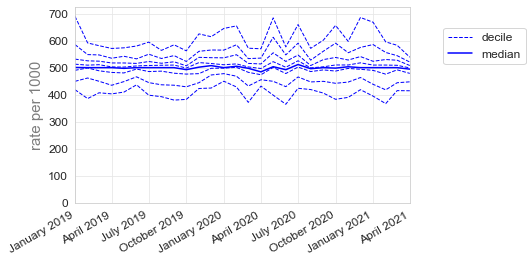

In [21]:
df = data_dict_practice["antipsychotics_first_gen"]

calculate_rate(df, "antipsychotics_first_gen", "population")

deciles_chart(
        df,
        period_column="date",
        column="num_per_thousand",
        ylabel="rate per 1000",
        interactive=False,
    )

<a id="second_gen_antipsychotics"></a>
### Second generation antipsychotics, excluding long acting depots

The codes used for this measure are available in <a href="https://codelists.opensafely.org/codelist/opensafely/second-generation-antipsychotics-excluding-long-acting-injections/6c7c3c11/">this codelist</a>.

#### 1. Absolute number of antipsychotics issued

Practices included: 43 (97.73%)

Total patients: 0.76M (0.14M events)

,dmd_id,Events,Events (thousands),dmd_type,Description,bnf_code
0,321589009,111919.0,111.919,VMP,Risperidone 1mg tablets,040201030AAAAAA
1,321590000,27829.0,27.829,VMP,Risperidone 2mg tablets,040201030AAABAB


<AxesSubplot:xlabel='date'>

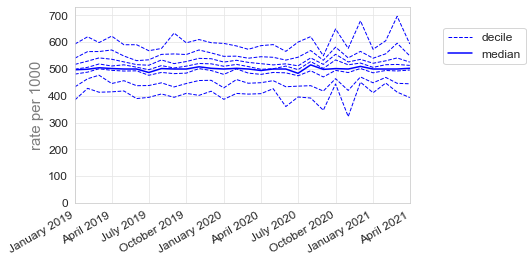

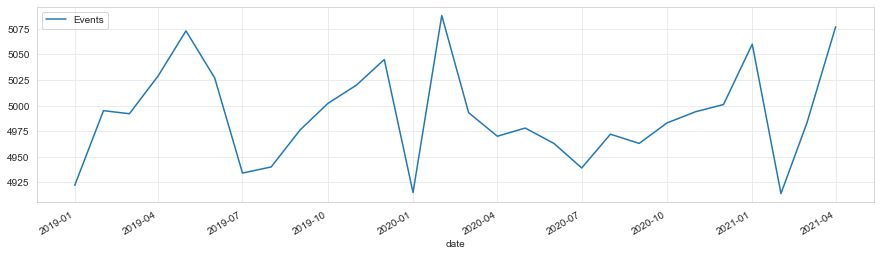

In [26]:
antipsychotics_first_gen_table = generate_sentinel_measure(data_dict, data_dict_practice, codelist_dict, 'antipsychotics_second_gen', 'dmd_id', 'dmd_name', ["2020-02-01", "2020-04-01", "2020-12-01"], interactive=INTERACTIVE)

measure = "antipsychotics_second_gen"

df = data_dict[measure]
    
event_counts = (
    df.groupby(f"date")[f"{measure}"]
    .sum()  # We can't use .count() because the measure column contains zeros.
    .rename("Events")
    .reset_index()
    .sort_values("Events", ascending=False)
)

event_counts.index=pd.to_datetime(event_counts["date"], format="%Y-%m-%d")
event_counts=event_counts.drop(columns=["date"])

event_counts.plot(figsize=(15,4))

#### 2. Number of first prescriptions (defined as none in previous two years)



#### 3. Decile of antipsychotics / Rate per 1000

In [ ]:
df = data_dict_practice["antipsychotics_second_gen"]

calculate_rate(df, "antipsychotics_second_gen", "population")

deciles_chart(
        df,
        period_column="date",
        column="num_per_thousand",
        ylabel="rate per 1000",
        interactive=False,
    )

<a id="antipsychotics_injectable_and_depot"></a>
### Long acting injectable and depot antipsychotics

The codes used for this measure are available in <a href="https://codelists.opensafely.org/codelist/opensafely/long-acting-injectable-and-depot-antipsychotics-dmd/536cc8dc/">this codelist</a>.

#### 1. Absolute number of antipsychotics issued

In [ ]:
antipsychotics_first_gen_table = generate_sentinel_measure(data_dict, data_dict_practice, codelist_dict, 'antipsychotics_injectable_and_depot', 'dmd_id', 'dmd_name', ["2020-02-01", "2020-04-01", "2020-12-01"], interactive=INTERACTIVE)

measure = "antipsychotics_injectable_and_depot"

df = data_dict[measure]
    
event_counts = (
    df.groupby(f"date")[f"{measure}"]
    .sum()  # We can't use .count() because the measure column contains zeros.
    .rename("Events")
    .reset_index()
    .sort_values("Events", ascending=False)
)

event_counts.index=pd.to_datetime(event_counts["date"], format="%Y-%m-%d")
event_counts=event_counts.drop(columns=["date"])

event_counts.plot(figsize=(15,4))

#### 2. Number of first prescriptions (defined as none in previous two years)__



#### 3. Decile of antipsychotics / Rate per 1000

In [ ]:
df = data_dict_practice["antipsychotics_injectable_and_depot"]

calculate_rate(df, "antipsychotics_injectable_and_depot", "population")

deciles_chart(
        df,
        period_column="date",
        column="num_per_thousand",
        ylabel="rate per 1000",
        interactive=False,
    )

<a id="prochlorperazine"></a>
### Prochlorperazine

The codes used for this measure are available in <a href="https://codelists.opensafely.org/codelist/opensafely/prochlorperazine-dmd/058baf47/">this codelist</a>.

#### 1. Absolute number of antipsychotics issued

In [ ]:
antipsychotics_first_gen_table = generate_sentinel_measure(data_dict, data_dict_practice, codelist_dict, 'prochlorperazine', 'dmd_id', 'dmd_name', ["2020-02-01", "2020-04-01", "2020-12-01"], interactive=INTERACTIVE)

measure = "prochlorperazine"

df = data_dict[measure]
    
event_counts = (
    df.groupby(f"date")[f"{measure}"]
    .sum()  # We can't use .count() because the measure column contains zeros.
    .rename("Events")
    .reset_index()
    .sort_values("Events", ascending=False)
)

event_counts.index=pd.to_datetime(event_counts["date"], format="%Y-%m-%d")
event_counts=event_counts.drop(columns=["date"])

event_counts.plot(figsize=(15,4))

#### 2. Number of first prescriptions (defined as none in previous two years)__



#### 3. Decile of antipsychotics / Rate per 1000

In [ ]:
df = data_dict_practice["prochlorperazine"]

calculate_rate(df, "prochlorperazine", "population")

deciles_chart(
        df,
        period_column="date",
        column="num_per_thousand",
        ylabel="rate per 1000",
        interactive=False,
    )